In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

In [2]:
# %load import_set.py

# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import os
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn에 있는 모델들
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2.3.2 k-최근접 이웃 ( KNN 알고리즘 )

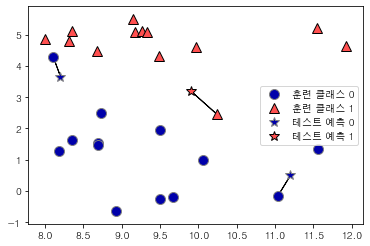

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 연결

-> 1-최근접 이웃 알고리즘의 예측은 같은색으로 연결한 포인트

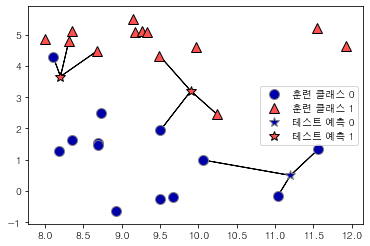

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 3개와 연결

-> 3-최근접 이웃 알고리즘의 예측은 1-최근접 이웃알고리즘의 예측결과와 다른 별 포인트가 생김!!

In [5]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [9]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


### KNeighborsClassifier 분석

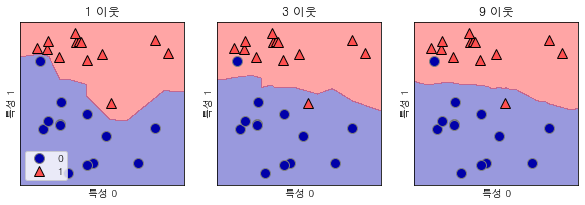

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n, ax in zip([1, 3, 9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)
plt.show();

이웃의 수를 늘릴수록 결정 경계는 부드러워진다  ->  단순한 모델 (복잡도가 낮아짐)

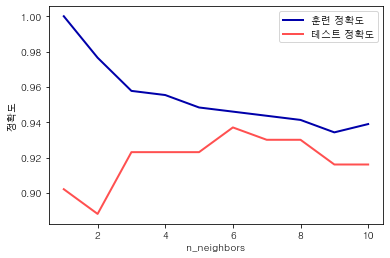

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
n_settings = range(1, 11)
for n in n_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_settings, training_accuracy, label = "훈련 정확도")
plt.plot(n_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

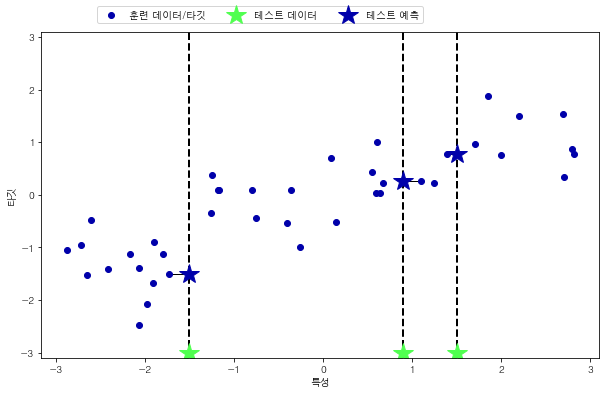

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 타깃값과 연결

-> 1-최근접 이웃 알고리즘의 예측은 그냥 가장 가까운 타깃값

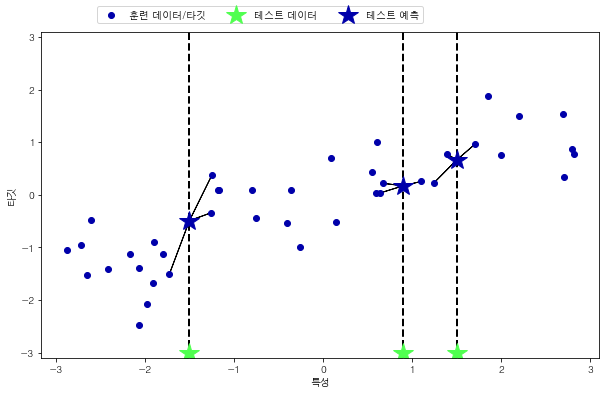

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 3개의 타깃값과 연결

-> 3-최근접 이웃 알고리즘의 예측은 3개의 가장 가까운 타깃값의 평균!!

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave dataset을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [15]:
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


결정 계수 R^2값은 보통 0과 1사이의 값
- 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값의 평균으로만 예측한 경우
- 음수값은 예측과 타깃이 상반된 경향을 가지는 경우

In [16]:
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


### KNeighborsRegressor 분석

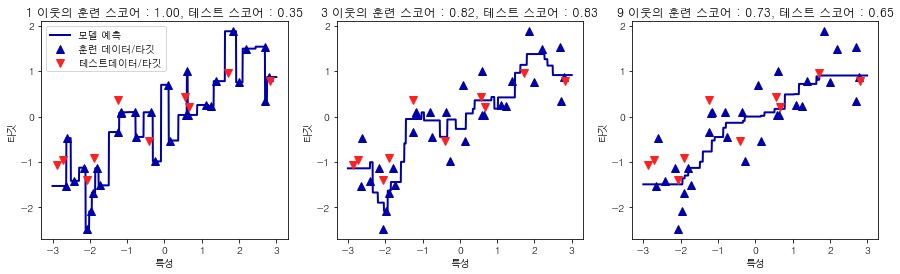

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# -3과 2 사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1, 3, 9], axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors = n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f}, 테스트 스코어 : {:.2f}".format(n, reg.score(X_train, y_train),
                                                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트데이터/타깃"], loc = "best");

이웃을 많이 사용하면 훈련데이터는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 됩니다.  

#### KNeighbors 분류기에 중요한 매개변수는 두 개!!
- 데이터 포인트 사이의 거리를 재는 방법 : 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식 사용
- 이웃의 수